In [100]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


# Reading the csv file

In [2]:
data = pd.read_csv("C:\\Users\\91914\\Downloads\\creditcard.csv.zip")

In [3]:
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.loc[3,'Time']

1.0

In [6]:
data["Class"].unique()

array([0, 1], dtype=int64)

In [7]:
data['Class'].isnull().sum()

0

# Check the target value "Diabetes" is balanced or not

In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot: ylabel='count'>

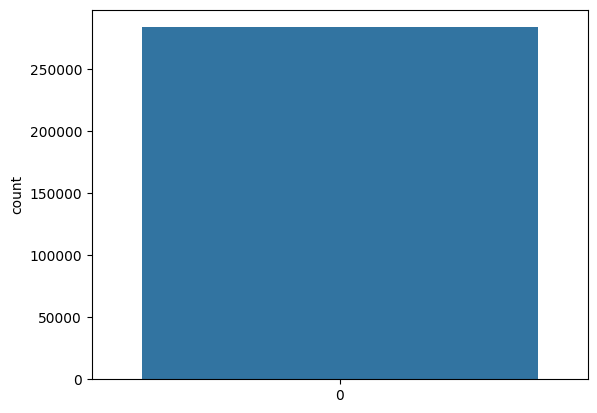

In [95]:
data["Class"].value_counts()
sns.countplot(data["Class"])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
data.duplicated().sum()

1081

In [12]:
data.drop_duplicates(inplace = True)

In [13]:
data.shape

(283726, 31)

In [14]:
data.duplicated().sum()

0

In [15]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [16]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [17]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [105]:
X.drop(["Time",axis = 1,inplace = True])

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (178458193.py, line 1)

# Train and Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

# Scaling the dependent Features

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss =  StandardScaler()

In [25]:
X_train = ss.fit_transform(X_train)

In [26]:
X_test = ss.transform(X_test)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression


In [28]:
import time
logreg =  LogisticRegression()
start = time.time()
logreg.fit(X_train,y_train)
end = time.time()
print("Time Taken:",end-start)

Time Taken: 0.8369414806365967


In [29]:
start = time.time()
print(logreg.score(X_test,y_test))

end = time.time()
print("Time Taken:",end-start)

0.9991365030134283
Time Taken: 0.012026309967041016


In [106]:
y_pred = logreg.predict(X_test)
print(f1_score(y_test,y_pred))

0.6620689655172414


In [107]:
confusion_matrix(y_test,y_pred)

array([[56649,    10],
       [   39,    48]], dtype=int64)

# Support Vector Classifier

In [31]:
import time
svc=  SVC()
start = time.time()
svc.fit(X_train,y_train)
end = time.time()
print("Time Taken:",end-start)

Time Taken: 139.77940678596497


In [36]:
start = time.time()
print(svc.score(X_test,y_test))

end = time.time()
print("Time Taken:",end-start)

0.9994008388256441
Time Taken: 13.00017499923706


In [98]:
y_pred = svc.predict(X_test)
print(f1_score(y_test,y_pred))

0.7702702702702702


In [99]:
confusion_matrix(y_test,y_pred)

array([[56655,     4],
       [   30,    57]], dtype=int64)

# KNN Classifier Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
import time
KNN =  KNeighborsClassifier()
start = time.time()
KNN.fit(X_train,y_train)
end = time.time()
print("Time Taken:",end-start)

Time Taken: 0.03516578674316406


In [39]:
start = time.time()
print(KNN.score(X_test,y_test))

end = time.time()
print("Time Taken:",end-start)

0.9994713283755683
Time Taken: 15.752749681472778


In [101]:
y_pred = KNN.predict(X_test)
print(f1_score(y_test,y_pred))

0.8076923076923076


In [102]:
confusion_matrix(y_test,y_pred)

array([[56653,     6],
       [   24,    63]], dtype=int64)

# DecisionTreeClassifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
import time
dt = DecisionTreeClassifier()
start = time.time()
dt.fit(X_train,y_train)
end = time.time()
print("Time Taken:",end-start)

Time Taken: 12.928270816802979


In [42]:
start = time.time()
print(dt.score(X_test,y_test))

end = time.time()
print("Time Taken:",end-start)

0.9992246149508336
Time Taken: 0.023381471633911133


In [52]:
y_pred = dt.predict(X_test)
print(f1_score(y_test,y_pred))

0.7471264367816093


In [53]:
confusion_matrix(y_test,y_pred)

array([[56637,    22],
       [   22,    65]], dtype=int64)

In [54]:
import sklearn
sklearn.__version__

'1.2.1'

# RandomForestClassifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
import time
rfc = RandomForestClassifier()
start = time.time()
rfc.fit(X_train,y_train)
end = time.time()
print("Time Taken:",end-start)

Time Taken: 13.39562439918518


In [57]:
start = time.time()
print(rfc.score(X_test,y_test))

end = time.time()
print("Time Taken:",end-start)

0.9991188806259472
Time Taken: 0.02154064178466797


In [103]:
y_pred = rfc.predict(X_test)
print(f1_score(y_test,y_pred))

0.7191011235955056


In [104]:
confusion_matrix(y_test,y_pred)

array([[56632,    27],
       [   23,    64]], dtype=int64)

In [58]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [59]:
dt.feature_importances_

array([1.25500215e-02, 1.11459738e-02, 1.94631507e-03, 8.95304930e-03,
       2.01334865e-02, 4.77104104e-03, 1.56337119e-02, 1.68542738e-02,
       2.52113861e-03, 0.00000000e+00, 3.10892493e-02, 1.18003797e-02,
       6.13182785e-02, 1.87297775e-02, 1.02004806e-01, 1.45705659e-02,
       1.50163919e-02, 5.35464976e-01, 1.29754338e-03, 6.73006079e-03,
       1.51516772e-02, 4.08461894e-03, 1.44598305e-02, 2.64311379e-03,
       6.80083831e-03, 5.94516947e-03, 2.30409158e-02, 3.04705335e-02,
       4.70053450e-04, 4.40220893e-03])

# Hyper Parameter Tuning

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
param_dist  = {'max_depth':[3,5,7],
                'max_features':[4,6,8],
              'min_samples_leaf':[3,5,7]}

In [65]:
rscv = RandomizedSearchCV(dt,param_dist,n_iter = 5)

In [66]:
rscv.fit(X_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=5,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'max_features': [4, 6, 8],
                                        'min_samples_leaf': [3, 5, 7]})

In [67]:
rscv.best_params_

{'min_samples_leaf': 3, 'max_features': 8, 'max_depth': 7}

In [74]:
final_model= rscv.best_estimator_
final_model

DecisionTreeClassifier(max_depth=7, max_features=8, min_samples_leaf=3)

In [68]:
rscv.score(X_test,y_test)

0.9994360836006062

In [69]:
pred = rscv.predict(X_test)

In [70]:
f1_score(y_test,pred)

0.7471264367816093

In [71]:
confusion_matrix(y_test,pred)

array([[56647,    12],
       [   20,    67]], dtype=int64)

# Increasing the number of iterations to 15

In [83]:
rscv = RandomizedSearchCV(dt,param_dist,n_iter = 15)

In [84]:
rscv.fit(X_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'max_features': [4, 6, 8],
                                        'min_samples_leaf': [3, 5, 7]})

In [87]:
rscv.best_params_

{'min_samples_leaf': 3, 'max_features': 8, 'max_depth': 7}

In [88]:
rscv.score(X_test,y_test)

0.9992422373383146

In [89]:
pred = rscv.predict(X_test)

In [90]:
f1_score(y_test,pred)

0.718954248366013

In [91]:
confusion_matrix(y_test,pred)

array([[56648,    11],
       [   32,    55]], dtype=int64)